![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

# 1.0 - Sea Level Predictor

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

In this assignment, we will be fetching the data of the global sea levels from year 1880 up until 2014. Then, a scatterplot will be plotted for the sea levels, then 2 line of best fit will be plotted on the graph:
* One line of best fit using ALL the data, meaning from year 1880 up until 2014
* One line of best fit using data starting from 2000 ONLY, up until the year 2014

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

### 1.1 - Fetching CSV in More Traditional Way

As usual, the more 'traditional' way of fetching CSV are using the `requests` method. However this way we will have to construct the `DataFrame` ourselves, and converting datatype of each column ourselves.

In [302]:

# Let's first import the necessary libraries first:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import requests
from typing import *


In [303]:

# Here is the traditional way of fetching the CSV data, using requests library
def read_csv_using_requests( url:str, delimiter:str=',' ) -> List:
    if ( len(delimiter) != 1 ):
        raise ValueError("Length of delimiter must be 1! Provided: {}".format(delimiter) )
    try:
        response: requests.Response = requests.request('GET', url )
        if (response.status_code != 200):
            raise ConnectionError()
    except:
        raise ConnectionError("Error Occurred while trying to fetch the CSV with given url: {}".format( url ) )

    # Split the text into lines, then split each line using the delimiter
    values = response.text.split('\r\n')
    values = list( map( lambda x: x.split(delimiter) , values ) )

    return values


In [304]:

# Here is a testing code to test above function works or not
read_csv_using_requests('https://raw.githubusercontent.com/AdmiJW/Items/master/epa-sea-level_csv.csv')


[['Year',
  'CSIRO Adjusted Sea Level',
  'Lower Error Bound',
  'Upper Error Bound',
  'NOAA Adjusted Sea Level'],
 ['1880-03-15', '0', '-0.952755905', '0.952755905', ''],
 ['1881-03-15', '0.220472441', '-0.732283464', '1.173228345', ''],
 ['1882-03-15', '-0.440944881', '-1.346456692', '0.464566929', ''],
 ['1883-03-15', '-0.232283464', '-1.129921259', '0.66535433', ''],
 ['1884-03-15', '0.590551181', '-0.283464567', '1.464566928', ''],
 ['1885-03-15', '0.531496062', '-0.330708661', '1.393700786', ''],
 ['1886-03-15', '0.437007874', '-0.381889763', '1.255905511', ''],
 ['1887-03-15', '0.216535433', '-0.602362204', '1.03543307', ''],
 ['1888-03-15', '0.299212598', '-0.519685039', '1.118110235', ''],
 ['1889-03-15', '0.362204724', '-0.456692913', '1.181102361', ''],
 ['1890-03-15', '0.440944881', '-0.374015748', '1.255905511', ''],
 ['1891-03-15', '0.374015748', '-0.440944881', '1.188976377', ''],
 ['1892-03-15', '0.499999999', '-0.31496063', '1.314960629', ''],
 ['1893-03-15', '0.68503

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

### 1.2 - Fetching CSV in Pandas Way

`pandas` comes with a handful function of reading CSV files provided url. This is way more convenient than fetching it using `requests` as it involves less line of code, and even already prepared a lot of parameter list for us to customize the behavior of CSV fetching!

In [305]:

# A wrapper function to simplify the interface of reading CSV using pandas. Only some functionalities are preserved
def read_csv_using_pandas( url:str, delimiter:str=',' , header:bool=False ):
    if ( len(delimiter) != 1 ):
        raise ValueError('Length of delimiter must be 1! Provided: {}'.format(delimiter) )

    df = pd.read_csv( url, sep=delimiter, header=0 if header else None)

    return df

In [306]:

# Here is a code snippet to test the function above
read_csv_using_pandas('https://raw.githubusercontent.com/AdmiJW/Items/master/epa-sea-level_csv.csv', header=True)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880-03-15,0.000000,-0.952756,0.952756,NaN
1,1881-03-15,0.220472,-0.732283,1.173228,NaN
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN
4,1884-03-15,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
130,2010-03-15,8.901575,8.618110,9.185039,8.122973
131,2011-03-15,8.964567,8.661417,9.267717,8.053065
132,2012-03-15,9.326772,8.992126,9.661417,8.457058
133,2013-03-15,8.980315,8.622047,9.338583,8.546648


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_blue.png?raw=true)

# 2.0 - Fetching the Data and Modifying DataFrame

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_blue.png?raw=true)

Now in this section, we are going to fetch the data in the traditional way, and setting the column names, index, and the datatypes of the columns ourselves.

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_blue.png?raw=true)

### 2.1 - Fetching the Data

Fetch the data using the 'traditional' way function defined above

In [307]:
arrays = read_csv_using_requests('https://raw.githubusercontent.com/AdmiJW/Items/master/epa-sea-level_csv.csv')

df = pd.DataFrame(arrays)

df.head()

,0,1,2,3,4
0,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
1,1880-03-15,0,-0.952755905,0.952755905,
2,1881-03-15,0.220472441,-0.732283464,1.173228345,
3,1882-03-15,-0.440944881,-1.346456692,0.464566929,
4,1883-03-15,-0.232283464,-1.129921259,0.66535433,


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_blue.png?raw=true)

### 2.2 - Set the Column Names

The first row of data is actually the column names. Set that and drop the first row afterwards

In [308]:
df.columns = df.iloc[0]

df.drop( 0, axis=0, inplace=True )

df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
1,1880-03-15,0,-0.952755905,0.952755905,
2,1881-03-15,0.220472441,-0.732283464,1.173228345,
3,1882-03-15,-0.440944881,-1.346456692,0.464566929,
4,1883-03-15,-0.232283464,-1.129921259,0.66535433,
5,1884-03-15,0.590551181,-0.283464567,1.464566928,


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_blue.png?raw=true)

### 2.3 - Deleting the Last Few Invalid Rows

We can see that the last row is either empty or doesn't contain useful data. We can drop them

In [309]:
df = df.iloc[:-2]

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_blue.png?raw=true)

### 2.4 - Setting the Year Column as Index

We shall be identifying each row based on the year that data is recorded. Therefore we set the year column as the index

In [310]:
df.index = df.Year

df.drop('Year', axis=1, inplace=True )

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 1880-03-15 to 2013-03-15
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CSIRO Adjusted Sea Level  134 non-null    object
 1   Lower Error Bound         134 non-null    object
 2   Upper Error Bound         134 non-null    object
 3   NOAA Adjusted Sea Level   134 non-null    object
dtypes: object(4)
memory usage: 2.6+ KB


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_blue.png?raw=true)

### 2.5 - Preserve only the Year

We can see that for the year column, the month and date are actually repeated, only the year are changing. Therefore we can simplify the column so that it contains only the year

In [311]:

# Map each date string so that only the first 4 characters (YEar) are obtained
substrArr = df.index.map( lambda s: s[:4] )

# Set the index, while converting it into data type of int16
df.index = substrArr.astype( np.int16 )

df.head()

,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
Year,,,,
1880,0,-0.952755905,0.952755905,
1881,0.220472441,-0.732283464,1.173228345,
1882,-0.440944881,-1.346456692,0.464566929,
1883,-0.232283464,-1.129921259,0.66535433,
1884,0.590551181,-0.283464567,1.464566928,


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_blue.png?raw=true)

### 2.6 - A Function that Finds Min and Max, or Errors in Numeric Column

We can write a function that checks for a column that are supposed to contain numeric data. If it is valid (All numeric data),
then return the max and min of the entire column, else it will return the row indices that contain error

In [312]:

# If the column is valid, will return [ True, [min, max] ]
# Otherwise if column is invalid, will reutrn [ False, [ indices of invalid data...] ]
def check_numeric_column( series:pd.Series ) -> List:
    result = [ True, list() ]
    min_val = float('inf')
    max_val = -float('inf')
    
    # Series requires us to use iloc, and will raise KeyError if we don't. THerefore catch the exception
    for i in range( len(series) ):
        try:
            n = float( series[i] )
        except:   
            try:
                n = float( series.iloc[i] )    # Maybe it is an KeyError. Try to use iloc instead!
            except:
                result[0] = False
                result[1].append(i)
                continue
        
        min_val = min(n, min_val)
        max_val = max(n, max_val)
    
    # If the first item is True, that means column is valid. Append min and max
    if result[0]:
        result[1].append(min_val)
        result[1].append(max_val)

    return result
            

In [313]:

# Testing the above function now
check_numeric_column( df.index )


[True, [1880.0, 2013.0]]

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_blue.png?raw=true)

### 2.7 - Converting All Columns into Float Datatype

All of those columns are supposed to contain floating point values. Therefore we will be converting all of the columns into the respective datatype.

In [314]:

##################################
# CSIRO Adjusted Sea Level Column
##################################

print( check_numeric_column( df['CSIRO Adjusted Sea Level'] ) )   # [True, [-0.440944881, 9.326771644] ]

df['CSIRO Adjusted Sea Level'] = df['CSIRO Adjusted Sea Level'].astype( np.float64 )


[True, [-0.440944881, 9.326771644]]


In [315]:

##################################
# Lower Error Bound
##################################

print( check_numeric_column( df['Lower Error Bound'] ) )   # [True, [-1.346456692, 8.992125975] ]

df['Lower Error Bound'] = df['Lower Error Bound'].astype( np.float64 )


[True, [-1.346456692, 8.992125975]]


In [316]:

##################################
# Upper Error Bound
##################################

print( check_numeric_column( df['Upper Error Bound'] ) )   # [True, [0.464566929, 9.661417313] ]

df['Upper Error Bound'] = df['Upper Error Bound'].astype( np.float64 )


[True, [0.464566929, 9.661417313]]


In [317]:

##################################
# NOAA Adjusted Sea Level
##################################

print( check_numeric_column( df['NOAA Adjusted Sea Level'] ) )   # [False, [...] ]

# The error is mainly due to empty strings. We can see that most of the years does not have entries for NOAA Adjusted Sea Level
# until recent years only. Therefore for it to parse correctly, first replace empty strings to np.nan

correctedNan = df['NOAA Adjusted Sea Level'].map( lambda x: x if len(x) else np.nan )

# Now only it can be interpreted                                         
print( check_numeric_column( correctedNan ) )   # [True, [ 6.297493046, 8.546648227] ]


# Convert the datatype
df['NOAA Adjusted Sea Level'] = correctedNan.astype( np.float64 )



[False, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112]]
[True, [6.297493046, 8.546648227]]


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 1880 to 2013
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CSIRO Adjusted Sea Level  134 non-null    float64
 1   Lower Error Bound         134 non-null    float64
 2   Upper Error Bound         134 non-null    float64
 3   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4)
memory usage: 9.2 KB


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_green.png?raw=true)

# 3.0 - Plotting

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_green.png?raw=true)

Now we have to plot the actual graph. First of all, we are going to plot the scatterplot of the sealevel against year. Then,
we will be going to add 2 line of best fit and extrapolate it up until year 2050.
* One using data from the beginning of data - year 1880
* One using data from the recent years - year 2000

Since this involves drawing of straight lines, let's make a little function which takes in gradient, y-intercept, and a x value, to calculate the y value


In [319]:


# Little function to calculate the y, given m, x and c. ( y = mx + c )

def calculate_y( m:float, c:float, x:float )->float:
    return m * x + c


In [371]:

def draw_plot():

    sns.set_style('whitegrid')
    #########################
    # Create scatter plot
    #########################
    plt.figure( figsize=(16,10) )
    
    axes = plt.scatter( df.index, df['CSIRO Adjusted Sea Level'], c='#3498db', s=20\
               ,linewidths=1, edgecolors='#2980b9')

    
    ################################
    # Create first line of best fit
    #################################
    # To get the line of best fit, we need the equation in the form y=mx+c. We need to obtain the gradient, m and the
    # y intercept, c which the scipy.stats will do for us!
    # After getting the m and c value, we need to draw a straight line, which start from minimum of the years, until 2050.
    # We need to obtain the y value for us to be able to plot the line up
    
    slope, intercept, _, _, _ = stats.linregress( df.index, df['CSIRO Adjusted Sea Level'] ) 
    
    # X and Y values to plot
    x_values1 = np.arange( df.index.min(), 2050 )
    
    y_values1 = [ calculate_y(slope, intercept, x) for x in x_values1 ]

    
    plt.plot(x_values1, y_values1,'r:', label=f'Extrapolate from Year {df.index.min()}', )
    

    #####################################
    # Create second line of best fit
    #####################################
    slope, intercept, _, _, _ = stats.linregress( df.loc[2000:].index, df.loc[2000:]['CSIRO Adjusted Sea Level'] )
    
    # X values to plot
    x_values2 = np.arange(2000, 2050 )
    # Y values to plot
    y_values2 = [ calculate_y(slope, intercept, x) for x in x_values2 ]
    
    plt.plot( x_values2, y_values2, 'b--', label='Extrapolate from Year 2000')

    ##########################
    # Add labels and title
    ###########################
    plt.title('Rise in Sea Level', fontsize='xx-large')
    plt.xlabel('Year', fontsize='x-large')
    plt.ylabel('Sea Level (inches)', fontsize='x-large')
    plt.xticks( [x*25 + 1850 for x in range(10) ] )
    plt.legend( fontsize='large', shadow=True, borderpad=1)

    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()


[-0.5421240249263661, -0.4790794409142336, -0.41603485690210107, -0.35299027288996854, -0.2899456888778218, -0.22690110486568926, -0.16385652085355673, -0.1008119368414242, -0.03776735282929167, 0.025277231182840865, 0.08832181519498761, 0.15136639920712014, 0.21441098321925267, 0.2774555672313852, 0.34050015124351773, 0.40354473525565027, 0.466589319267797, 0.5296339032799295, 0.5926784872920621, 0.6557230713041946, 0.7187676553163271, 0.7818122393284597, 0.8448568233405922, 0.9079014073527389, 0.9709459913648715, 1.033990575377004, 1.0970351593891365, 1.160079743401269, 1.2231243274134016, 1.2861689114255483, 1.3492134954376809, 1.4122580794498134, 1.475302663461946, 1.5383472474740785, 1.601391831486211, 1.6644364154983577, 1.7274809995104903, 1.7905255835226228, 1.8535701675347553, 1.9166147515468879, 1.9796593355590204, 2.042703919571167, 2.1057485035832997, 2.168793087595432, 2.2318376716075647, 2.2948822556196973, 2.35792683963183, 2.4209714236439766, 2.484016007656109, 2.547060

<AxesSubplot:title={'center':'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

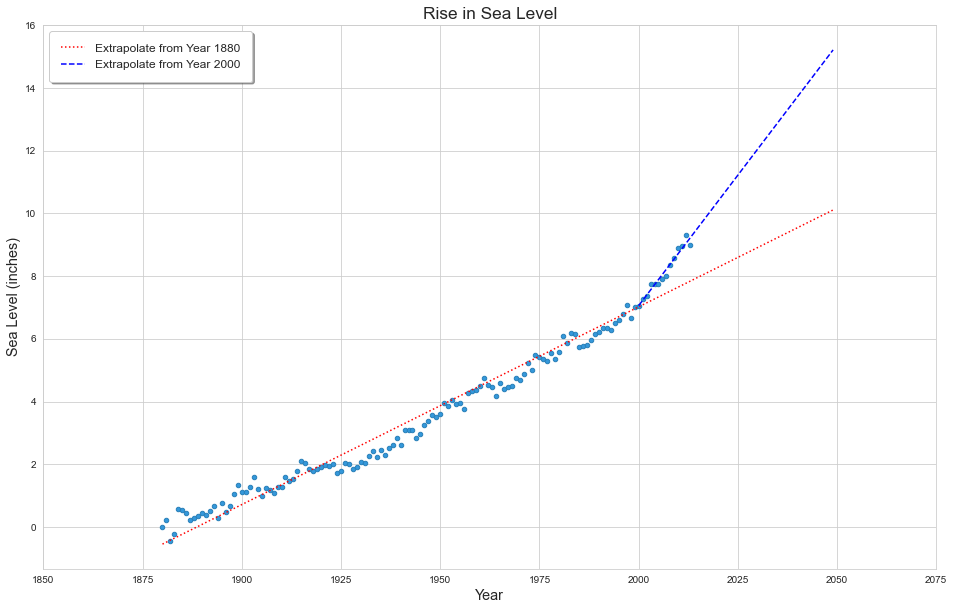

In [372]:
draw_plot()

In [377]:
df.iloc[-3]['CSIRO Adjusted Sea Level']

8.96456692